# **Introduction** <a class="anchor" id="1"></a>

[Table of Contents](#0.1)

Today, bike sharing systems have revolutionized traditional bike rentals by offering a completely automated process, from membership to rental and return. These systems allow users to easily rent a bike from a specific location and return it to another convenient location. With more than 500 bike-sharing programs around the world and more than 500,000 bicycles in circulation, these systems have sparked great interest due to their important role in traffic, environmental and health issues.

In addition to their practical real-world applications, bike-sharing systems exhibit data characteristics that make them attractive for research. Unlike other transportation services, such as buses or subways, these systems explicitly record trip duration, departure position, and arrival position. This feature turns bike-sharing systems into a network of virtual sensors that can be used to detect mobility in the city. It is expected that by monitoring this data, it will be possible to identify most of the important events that occur in the city.

In this context, time series models are presented as a crucial tool to analyze and predict the usage patterns of bicycle sharing systems. These models allow trends, seasonality and cyclical patterns to be identified in the collected data, which provides valuable information for the efficient planning and management of these systems. By leveraging the vast amount of data available, time series models can help better understand user behavior, predict future demand, and optimize bike station placement.

In short, bike sharing systems represent an innovation in bike rental, with an automated approach that makes it easier to use. Furthermore, the nature of the data generated by these systems makes them a valuable source for investigation and detection of important events in the city. Time series models are presented as a fundamental tool to analyze and predict the use patterns of these systems, which contributes to improving the planning and management of urban mobility.

# **Case study** <a class="anchor" id="2"></a>

[Table of Contents](#0.1)

In this case study, we will focus on forecasting the demand for bike share rentals in a specific system over the next 36 hours. The main objective is to provide the company in charge of managing the rental stations with an accurate estimate of the expected demand so that they can make informed decisions about the availability of bicycles and optimize their operation.

To forecast demand, historical shared bicycle rental data will be available, which will include information such as the date and time of rental, among other variables. This historical data will be used to train and evaluate the forecast model.

We will use different techniques for analysis and forecasting:

1. Data collection.
2. Exploratory data analysis.
3. Data preparation.
4. Model selection.
5. Model adjustment and evaluation.
6. Shared bike rental demand forecast.

By developing a time series forecasting model, this case study will predict the demand for shared bike rentals in the next 36 hours, providing the company in charge of managing the rental stations with valuable information to optimize their operation. Knowing the expected demand, they will be able to adjust the availability of bicycles at each station, plan maintenance and carry out strategic actions to meet user needs efficiently. Accurate demand forecasting will also help improve user experience by ensuring greater availability of bikes at peak demand times.

## **Load Library**

In [38]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [39]:
# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose 
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#008080', #212946 #29021A
    'axes.facecolor': '#008080',
    'savefig.facecolor':'#008080',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

# Definir el tamaño del gráfico
# ==============================================================================
from pylab import rcParams
rcParams['figure.figsize'] = (18,6)

## **Load data**

Information about our data:

	- date_time : date and hours
	- month : month ( 1 to 12)
	- hour : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weather : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
	- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- users: count of total rental bikes including both casual and registered


In [40]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/bike_sharing_dataset_clean.csv",parse_dates=["date_time"])
df

,date_time,holiday,workingday,weather,temp,atemp,hum,windspeed,users,month,hour,weekday
0,2011-01-01 00:00:00,0.0,0.0,clear,9.84,14.395,81.0,0.0000,16.0,1,0,5
1,2011-01-01 01:00:00,0.0,0.0,clear,9.02,13.635,80.0,0.0000,40.0,1,1,5
2,2011-01-01 02:00:00,0.0,0.0,clear,9.02,13.635,80.0,0.0000,32.0,1,2,5
3,2011-01-01 03:00:00,0.0,0.0,clear,9.84,14.395,75.0,0.0000,13.0,1,3,5
4,2011-01-01 04:00:00,0.0,0.0,clear,9.84,14.395,75.0,0.0000,1.0,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2012-12-31 19:00:00,0.0,1.0,mist,10.66,12.880,60.0,11.0014,119.0,12,19,0
17540,2012-12-31 20:00:00,0.0,1.0,mist,10.66,12.880,60.0,11.0014,89.0,12,20,0
17541,2012-12-31 21:00:00,0.0,1.0,clear,10.66,12.880,60.0,11.0014,90.0,12,21,0
17542,2012-12-31 22:00:00,0.0,1.0,clear,10.66,13.635,56.0,8.9981,61.0,12,22,0


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [4]:
df["unique_id"]="1"
df=df.rename(columns={"date_time": "ds", "users": "y"})
df.head()

,ds,holiday,workingday,weather,temp,atemp,hum,windspeed,y,month,hour,weekday,unique_id
0,2011-01-01 00:00:00,0.0,0.0,clear,9.84,14.395,81.0,0.0,16.0,1,0,5,1
1,2011-01-01 01:00:00,0.0,0.0,clear,9.02,13.635,80.0,0.0,40.0,1,1,5,1
2,2011-01-01 02:00:00,0.0,0.0,clear,9.02,13.635,80.0,0.0,32.0,1,2,5,1
3,2011-01-01 03:00:00,0.0,0.0,clear,9.84,14.395,75.0,0.0,13.0,1,3,5,1
4,2011-01-01 04:00:00,0.0,0.0,clear,9.84,14.395,75.0,0.0,1.0,1,4,5,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          17544 non-null  datetime64[ns]
 1   holiday     17544 non-null  float64       
 2   workingday  17544 non-null  float64       
 3   weather     17544 non-null  object        
 4   temp        17544 non-null  float64       
 5   atemp       17544 non-null  float64       
 6   hum         17544 non-null  float64       
 7   windspeed   17544 non-null  float64       
 8   y           17544 non-null  float64       
 9   month       17544 non-null  int64         
 10  hour        17544 non-null  int64         
 11  weekday     17544 non-null  int64         
 12  unique_id   17544 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 1.7+ MB


# **Explore Data with the plot method** <a class="anchor" id="3"></a>

[Table of Contents](#0.1)

Graphical visualization of time series can be an effective strategy for detecting trends, patterns, and seasonality. This approach, in turn, makes it easier to identify potential lags that could be used as predictors in the model.

We will use the `plot` method of `Statsforecast` to visualize our data. This method prints 8 random series from the dataset and is useful for basic EDA.

This is what our data looks like, after having performed a couple of maneuvers on our data.

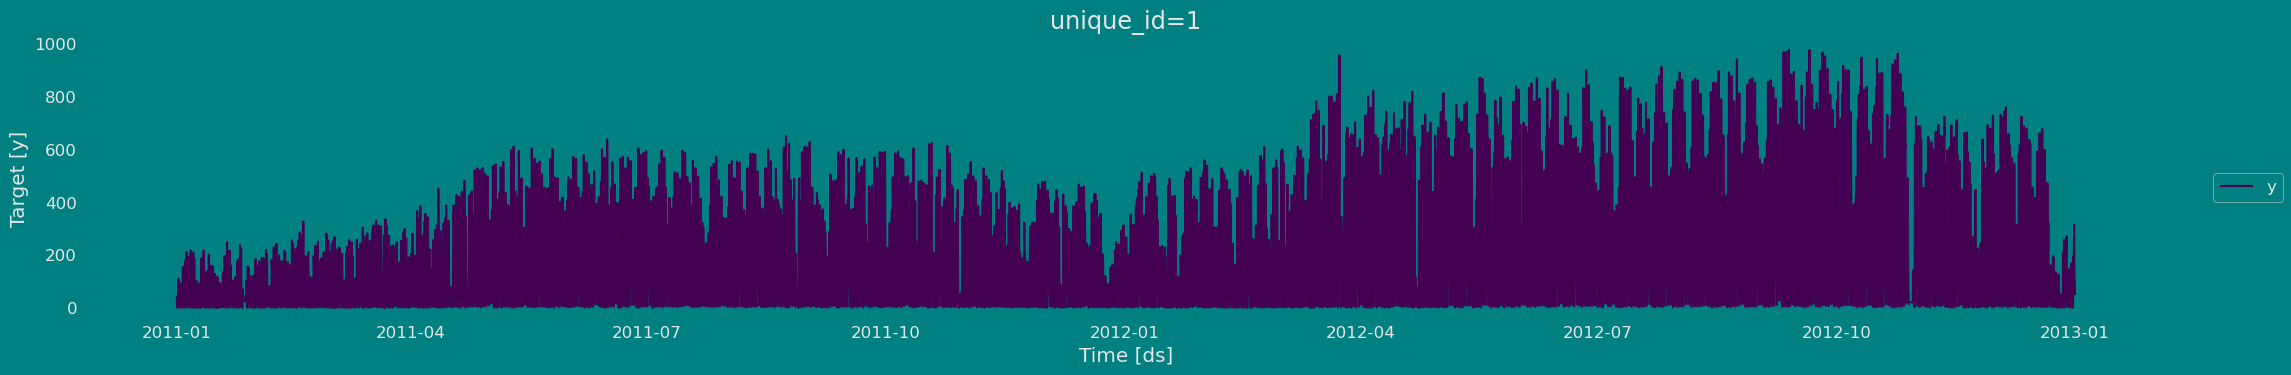

In [6]:
plot_series(df)

## **Seasonality**

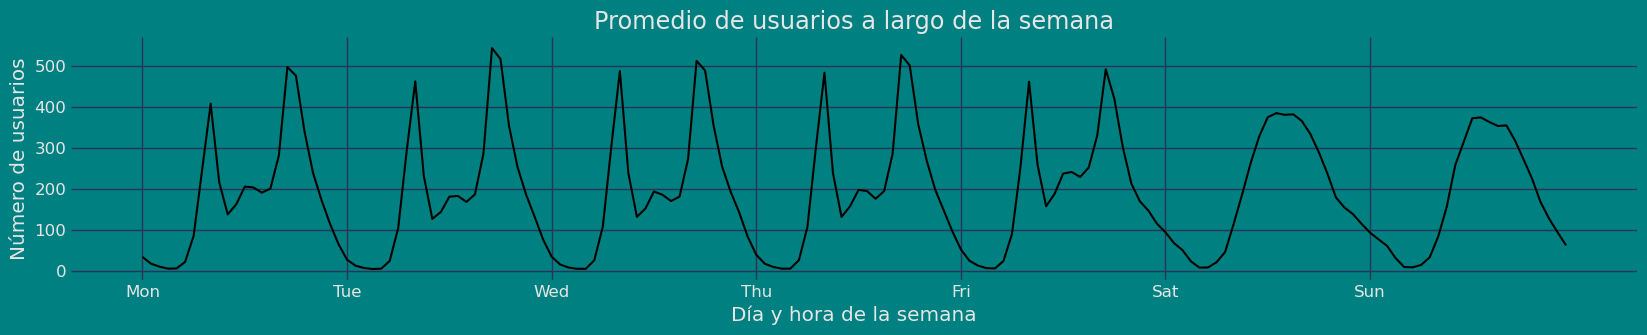

In [7]:
# Gráfico estacionalidad diaria
# ==============================================================================
fig, ax = plt.subplots(figsize=(18, 3))
promedio_dia_hora = df.groupby(["weekday", "hour"])["y"].mean()
promedio_dia_hora.plot(ax=ax, label='promedio', color="black")
ax.set(
    title="Promedio de usuarios a largo de la semana",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    xlabel="Día y hora de la semana",
    ylabel="Número de usuarios");

You can notice an obvious distinction between weekdays and weekends. Furthermore, a well-defined daily pattern can be observed, with variations in the number of users depending on the time of day.

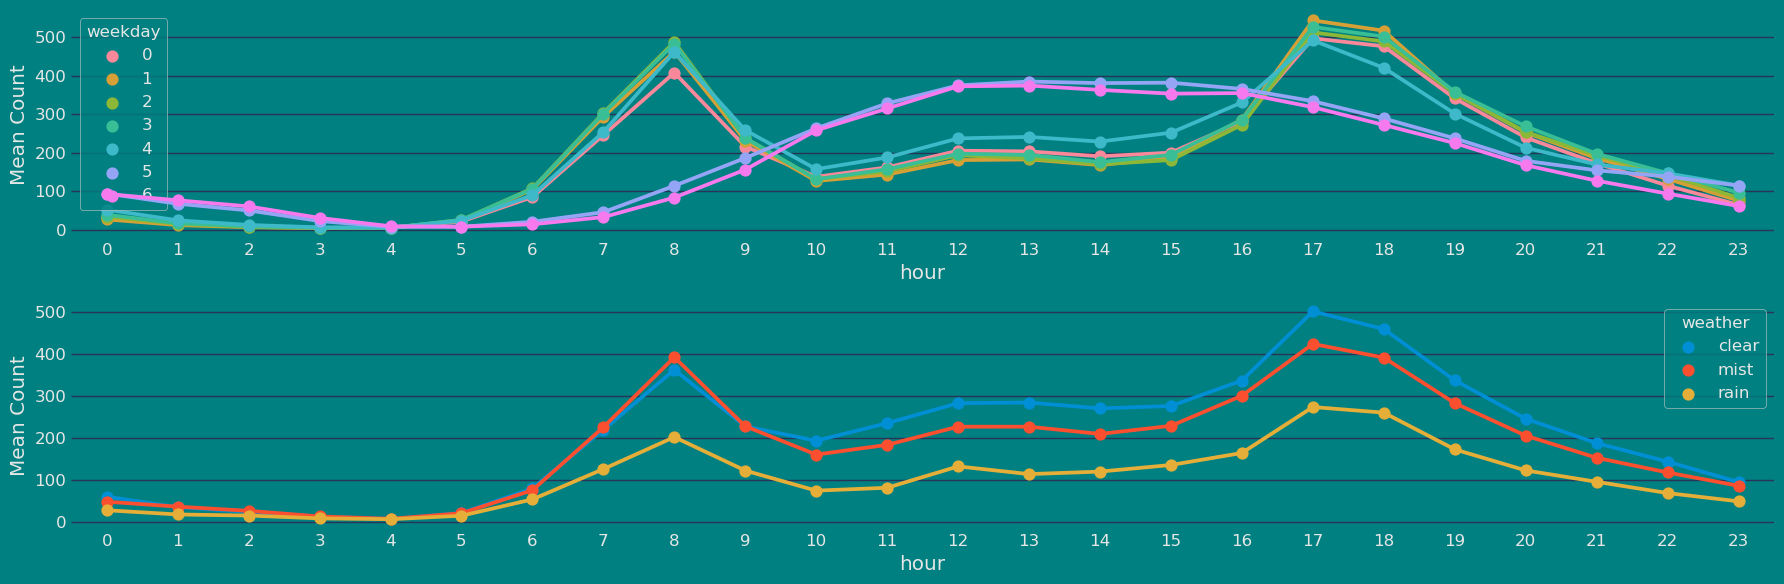

In [8]:
# Create a 2x1 grid of subplots with a shared x-axis and a size of 20x20 inches
fig, ax = plt.subplots(2, 1, figsize=(18, 6))

# Plot the mean rental counts per hour based on day of the week
hour_day_df = df.groupby(["hour", "weekday"])["y"].mean().to_frame().reset_index()
ax1 = sns.pointplot(x=hour_day_df["hour"], y=hour_day_df["y"], hue=hour_day_df["weekday"], ax=ax[0])
ax1.set_ylabel("Mean Count")

# Plot the mean rental counts per hour based on weather conditions
hour_weather_df = df.groupby(["hour", "weather"])["y"].mean().to_frame().reset_index()
ax3 = sns.pointplot(x=hour_weather_df["hour"], y=hour_weather_df["y"], hue=hour_weather_df["weather"], ax=ax[1])
ax3.set_ylabel("Mean Count")

# Adjust the layout to avoid overlapping of subplots
plt.tight_layout()
# Show the plot
plt.show()

The day-of-week chart reveals distinct patterns in bike rental counts. Weekdays (Monday through Friday), rental counts show a similar trend, with higher usage during business hours, consistent with our previous observation. However, on weekends (Saturday and Sunday), rental counts show a different pattern, with higher usage in the afternoon. This variation highlights the importance of the day of the week in influencing bike rental behavior. The analysis indicates that weekdays are characterized by greater commuting use, while weekends see greater recreational use in the afternoon hours. Understanding these patterns can provide valuable information for optimizing bike sharing services and resource allocation based on specific days and times of high demand.

Analysis of the graph confirms a notable trend between weekends (Saturday and Sunday), where your rental counts remain constant throughout the day, except for the last three hours. It is evident that Saturday has the highest number of rentals compared to other days, especially in the last hour. The reason behind this behavior is that both Friday and Saturday mark the weekend, giving people the opportunity to stay out late and subsequently affecting rental counts in the later hours. On the other hand, weekdays require early waking up, leading to lower rental counts during the later hours. This observation highlights the influence of day of the week on rental patterns and may be valuable in designing strategies to optimize bike sharing services during specific hours and days.

## **Autocorrelation plots**
Viewing autocorrelation plots can be useful for detecting patterns in time series data. If high autocorrelation is observed at a specific lag in the autocorrelation plot, this suggests that that lag may be a relevant predictor for the analysis.

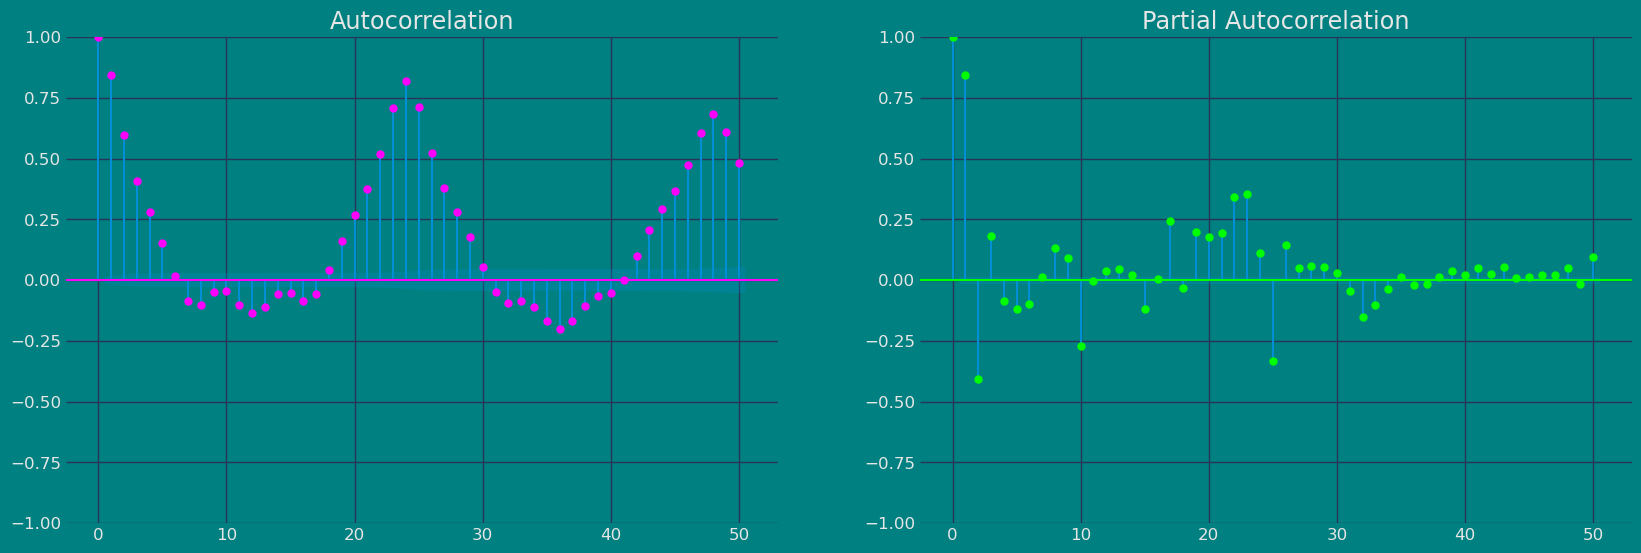

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=50, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["y"],  lags=50, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

#plt.savefig("Gráfico de Densidad y qq")
plt.show();

The findings of the autocorrelation analysis reveal a significant relationship between the number of users in previous hours and days, and the number of users in the future. This suggests that having information about the number of users at specific periods in the past can be useful for predicting the number of users in the future.

## **Correlation Matrix of Variables**

In [10]:
df.drop(["weather"], axis=1, inplace=True)

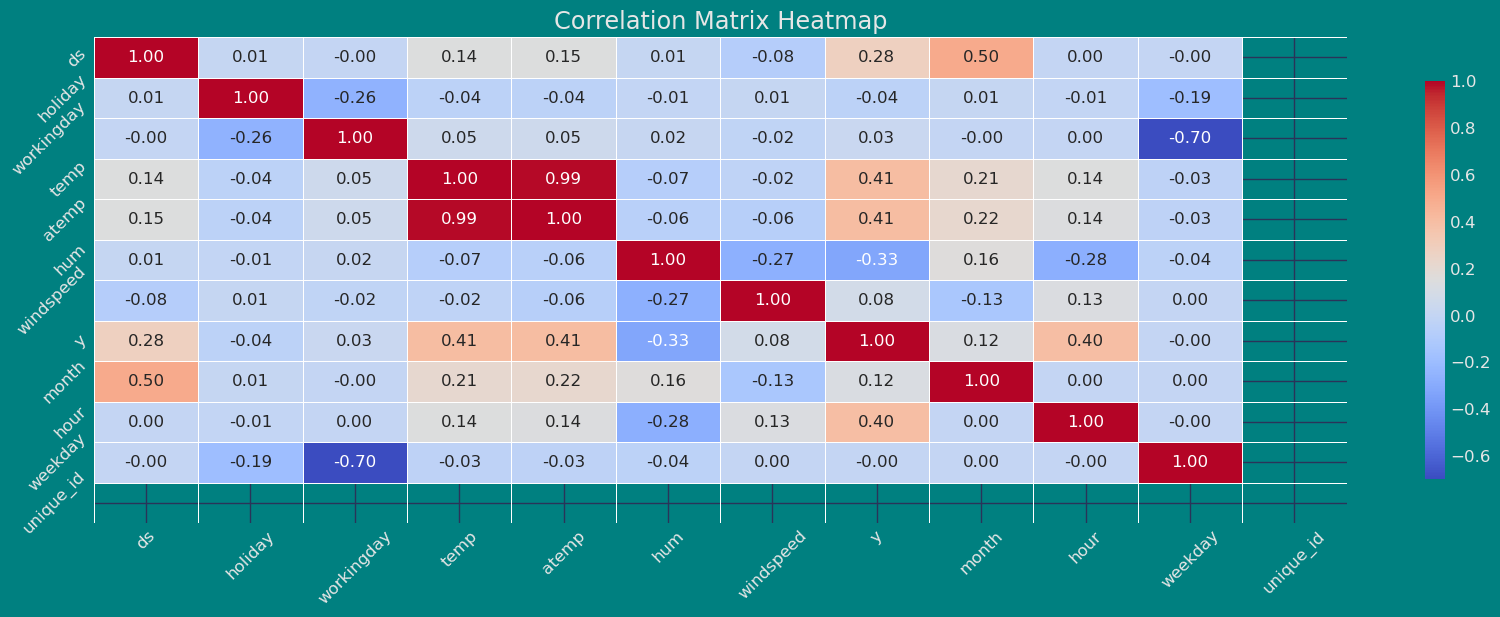

In [11]:
plt.figure(figsize=(18, 6))  # Set the figure size to be larger
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt= '.2f', cbar_kws={"shrink": .82})  # Enlarge the heatmap, add linewidths, and change format to two decimal places
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels for better readability
plt.title('Correlation Matrix Heatmap')  # Add a title
plt.show()

By making a correlation matrix we can explore and understand the relationships between variables in our data set. It provides key information for decision making, variable selection, detection of dependencies and validation of assumptions, thus improving the quality and interpretation of data analyses.

# **Split the data into training and testing** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

Let's divide our data into sets
1. Data to train our model
2. Data to test our model

For the test data we will use the last 36 days to test and evaluate the performance of our model.

In [12]:
data=df.tail(4000)
df1=data[["ds","y","unique_id"]]

In [13]:
train = df1[df1.ds<='2012-12-30 11:00:00'] 
test=df1[(df1['ds'] > '2012-12-30 11:00:00')]

train.shape, test.shape

((3964, 3), (36, 3))

# **Implementation with StatsForecast** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

We are going to train the `Arima` model, using the `AutoArima` function. This model will help us forecast user demand in the next 36 hours.

In [14]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA,
from statsforecast.arima import arima_string

In [15]:
season_length = 24 # Hourly data 
horizon = 36 # number of predictions

# We call the model that we are going to use
models = [AutoARIMA(season_length=season_length)]
          

In [16]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(
    df=train,
    models=models,
    freq='H', 
    n_jobs=-1)

## **Fit the Model**

In [17]:
sf.fit()

StatsForecast(models=[AutoARIMA])

## **Predict Method**

In [18]:
Y_hat = sf.predict(horizon)
Y_hat.head(10)

,ds,AutoARIMA
unique_id,,
1,2012-12-30 12:00:00,119.452003
1,2012-12-30 13:00:00,125.628517
1,2012-12-30 14:00:00,122.845268
1,2012-12-30 15:00:00,133.556702
1,2012-12-30 16:00:00,155.581055
1,2012-12-30 17:00:00,153.746246
1,2012-12-30 18:00:00,131.220749
1,2012-12-30 19:00:00,99.714516
1,2012-12-30 20:00:00,71.164024


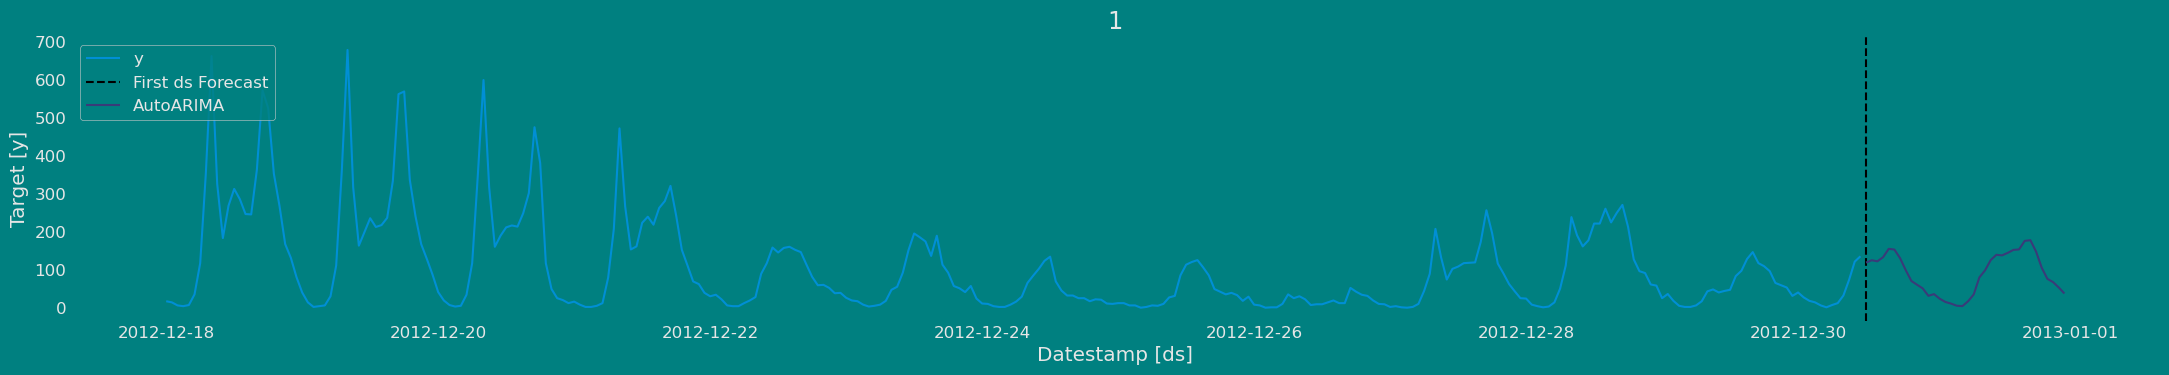

In [19]:
sf.plot(train, Y_hat,  max_insample_length=300)

# **Evaluate the model** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

In [20]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [21]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [22]:
print("Modelo sin variable exogena")
evaluate_performace(train, test,Y_hat.reset_index() , models=['AutoARIMA'])

Modelo sin variable exogena


,mae,mape,mase,rmse,smape
AutoARIMA,29.419618,56.648829,0.367026,45.618235,34.103393


## **Exogenous variables**

We are going to select the exogenous variables that will enter our model, for this it is necessary to have two sets of data:

1. The training data: these data contain the exogenous variables that we are going to add to our model plus the target variables.
2. Data with exogenous variables: we select the variables that we want to add to our model, this data set does not have the target variable.


In [23]:
df2=data[["ds","y","holiday","workingday", "temp","atemp", "hum", "windspeed","unique_id"]]

In [24]:
exogen=df2[["ds","holiday","workingday", "temp","atemp", "hum", "windspeed","unique_id"]] #   "temp",	"atemp", "hum", "windspeed", "month","hour"	,"weekday",

# **Splitting training and test data with exogenous variables** <a class="anchor" id="4"></a>

[Table of Contents](#0.1)

Let's divide our data into sets
1. Data to train our model
2. Data to test our model

For the test data we will use the last 36 days to test and evaluate the performance of our model.

In [25]:
train_exo = df2[df2.ds<='2012-12-30 11:00:00'] 
test_exo=exogen[(exogen['ds'] > '2012-12-30 11:00:00') ]

train_exo.shape, test_exo.shape

((3964, 9), (36, 8))

## **Implementation of StatsForecast with exogenous variables**

In [26]:
season_length = 24 # dayly data 
horizon = 36 # number of predictions

# We call the model that we are going to use
models_exo = [AutoARIMA(season_length=season_length)]                

In [27]:
# Instantiate StatsForecast class as sf
sf_exo = StatsForecast(
    models=models_exo,
    freq='H', 
    n_jobs=-1)
sf_exo

StatsForecast(models=[AutoARIMA])

## **Fit model with exogenous variables**

The fit method has two parameters:

* Training data with exogenous variables.
* Data with only exogenous variables.

In [28]:
sf_exo.fit(train_exo,test_exo)

StatsForecast(models=[AutoARIMA])

## **Predict Method**

The predict method takes only 2 parameters

* The Horizon: amount of data you want to predict
* Exogenous variables without the target variable

In [29]:
Y_hat_exo=sf_exo.predict(h=horizon,  X_df=test_exo) 
Y_hat_exo.head()

,ds,AutoARIMA
unique_id,,
1,2012-12-30 12:00:00,136.116287
1,2012-12-30 13:00:00,159.308182
1,2012-12-30 14:00:00,161.862534
1,2012-12-30 15:00:00,173.989288
1,2012-12-30 16:00:00,183.392685


In [30]:
actual_exo=df2[df2.ds>'2011-05-04 11:00:00'] 

## **Plot forecasting**

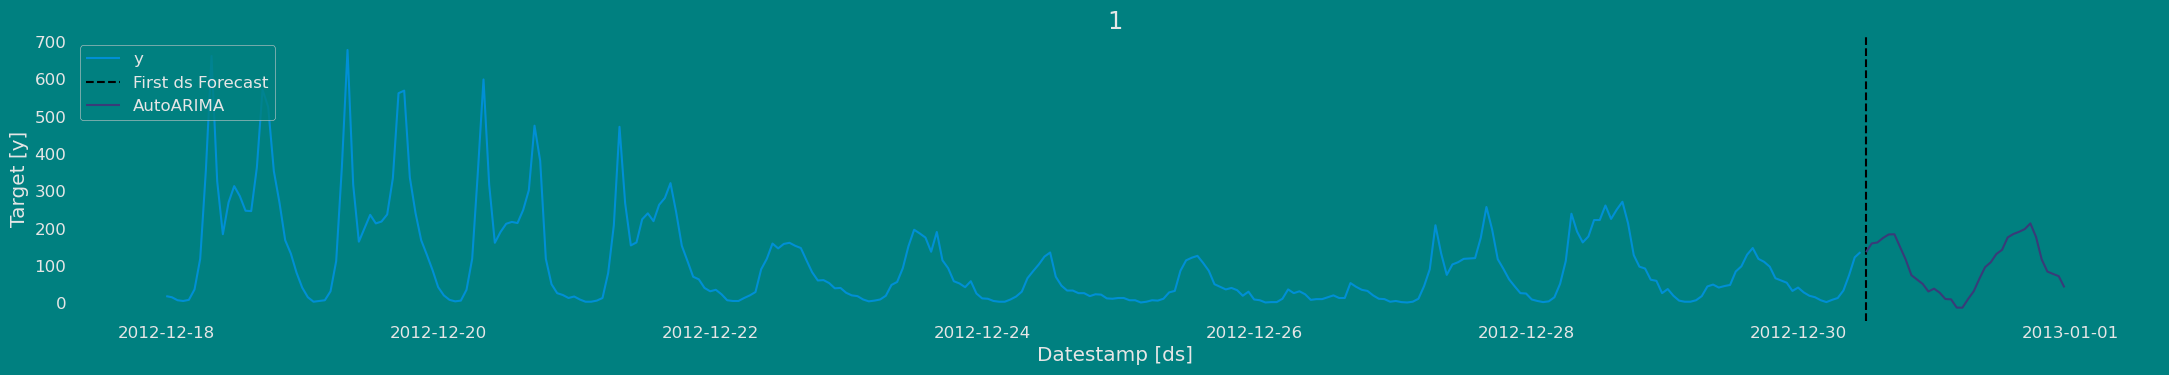

In [31]:
sf.plot(train_exo, Y_hat_exo,  max_insample_length=300)

# **Evaluate the model** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

In [32]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [33]:
print("Modelo con variable exogena")
evaluate_performace(train_exo, actual_exo,Y_hat_exo.reset_index() , models=['AutoARIMA'])

Modelo con variable exogena


,mae,mape,mase,rmse,smape
AutoARIMA,30.124756,0.616709,NaN,43.698252,0.379913


# **Conclusion** <a class="anchor" id="8"></a>


[Table of Contents](#0.1)

Developing this time series forecasting model using AutoArima, this case study allowed us to predict the demand for shared bike rentals in the next 36 hours, providing the company in charge of managing the rental stations with valuable information to optimize their operation. . Knowing the expected demand, they will be able to adjust the availability of bicycles at each station, plan maintenance and carry out strategic actions to meet user needs efficiently. Accurate demand forecasting will also help improve user experience by ensuring greater availability of bikes at peak demand times.

In [37]:
print("Model without exogenous variable")
print(evaluate_performace(train, test,Y_hat.reset_index() , models=['AutoARIMA']))
print("===="*20)
print("Model with exogenous variable")
print(evaluate_performace(train_exo, actual_exo,Y_hat_exo.reset_index() , models=['AutoARIMA']))

Model without exogenous variable
                 mae       mape      mase       rmse      smape
AutoARIMA  29.419618  56.648829  0.367026  45.618235  34.103393
Model with exogenous variable
                 mae      mape  mase       rmse     smape
AutoARIMA  30.124756  0.616709   NaN  43.698252  0.379913


However, the model with exogenous variable shows a slight improvement. Therefore, it may be advisable to consider using an exogenous variable to improve the forecast of bike-sharing rentals. However, other metrics and additional factors must be taken into account to make more accurate decisions.

We can consider other aspects to improve the model:

- As shown in this tutorial, the incorporation of exogenous variables as predictors can greatly improve the predictive capacity.
- Train different models that can improve the performance of the demand for shared bicycle rental.
- Develop a Cross Validations.
- Train Machine Learning and Deep Learning Models.

# **References** <a class="anchor" id="9"></a>


[Table of Contents](#0.1)

1. [Nixtla Parameters](https://nixtla.github.io/statsforecast/src/core/models.html#autoarima).
2. [Pandas available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
3. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”.](https://otexts.com/fpp3/tscv.html).
4. [Seasonal periods- Rob J Hyndman](https://robjhyndman.com/hyndsight/seasonal-periods/).
5. [AutoArima model](https://nixtla.github.io/statsforecast/docs/models/autoarima.html)